In [1]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patterns import data2patterns, msd2pattern, print_frequent_patterns, msd2decision
from patterns import scaled_al_heatmap, unscaled_al_ggh_heatmap, scaled_al_ggh_heatmap

In [2]:
# input parameters 
lang='tagalog'
exp_dir='experiments'
bpe_n=1000
beam_size=1

# segmented files
bpe_file_dev='{}/{}/bpe{}/dev_segm'.format(exp_dir,lang,bpe_n)
bpe_file_train='{}/{}/bpe{}/train_high_segm'.format(exp_dir,lang,bpe_n)
bpe_file_test='{}/{}/bpe{}/test_segm'.format(exp_dir,lang,bpe_n)
bpe_files = [bpe_file_dev, bpe_file_train, bpe_file_test]

# attention files for chED+subwSELF-ATT model
attn_file_dev='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_train='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-train-high.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_file_test='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-test.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)
attn_files = [attn_file_dev, attn_file_train, attn_file_test]

# gold files
gold_file_dev='{}/{}/{}-dev'.format(exp_dir,lang,lang)
gold_file_train='{}/{}/{}-train-high'.format(exp_dir,lang,lang)
gold_file_test='{}/{}/{}-test'.format(exp_dir,lang,lang)
gold_files = [gold_file_dev, gold_file_train, gold_file_test]

### Pattern extraction

####  Transformation Patterns

In [3]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

phen_msd = 'V;IPFV;AGFOC'
    
pattern_list = data2patterns(attn_data, allow_double_al=False)
phen_dict_regr, phen_dict_regr_freq, phen_dict_regr_acc = msd2pattern(phen_msd,
                                                                      attn_data,pattern_list,gold_files)

print_frequent_patterns(phen_msd, phen_dict_regr, 
                            phen_dict_regr_freq, phen_dict_regr_acc, n=15)

MSD V;IPFV;AGFOC, frequency: 377, accuracy: 0.864721

frequency: 142, coverage: 0.376657824933687, accuracy: 0.9014084507042254
unmasekd_pattern:  c1;2 c3;4 c5 --> n f2_0 c1 c3 c2 c4 c5
frequency by pattern:  {'c1;2 c3;4 c5 --> f1_0 f2_0 c1 c3 c2 c4 c5': 142}
alignments and masks for the most frequent masked pattern:

___mask2src_after_unmasking: c1;2: all of length 1; c3;4: [a:82, u:34, i:23, e:3]; c5: average length of 3.3

___trg2mask_after_unmasking (support 1): n:f1_0

___mask2trg_after_unmasking: f2_0: [ag:131, a:8, ang:1, an:2]; c1: all of length 1; c3: [a:82, u:34, i:23, e:3]; c2: all of length 1; c4: [a:82, u:34, i:23, e:3]; c5: average length of 3.3

IDs: 35 : paalam : nagpapaalam, 92 : damdám : nagdadamdám(gold: nagdaramdám), 93 : pugot : nagpupugot, 121 : kinig : nakikinig, 131 : timbang : nagtitimbang, 167 : yabang : nagyayabang, 197 : bisita : nagbibisita(gold: bumibista), 231 : mahal : nagmamahal, 235 : hagod : naghahagod, 262 : laga : naglalaga, 268 : garahe : naggagara

#### Lemma Patterns 

In [4]:
attn_data = []
for f in attn_files:
    attn_data.extend(torch.load(f))

print('Form start with um')
partial_trg = 'nag-'
partial_msd = 'V;IPFV;AGFOC'

phen_dict = msd2decision(partial_msd,partial_trg,attn_data,
                         gold_files,bpe_files,pattern='start',
                         n_global_heads=1,pull_max=False,ave_threshold=False)
for k,v in phen_dict.items():
    if k=='phen':
        print('class:{}, acc: {}, freq: {}'.format(k,
                                               v['acc']/v['freq'], v['freq']))
        for p,f in sorted(v['pat'].items(), key=lambda x:x[1]['freq'], reverse=True):
            if f['freq']>=1:
                print('{}:{}'.format(p,f['freq']))
                print('({})'.format(', '.join(f['ex'][:10])))

Form start with um
class:phen, acc: 0.7857142857142857, freq: 28
u*:6
(87:u|to|s, 1375:u|mp|isa, 1903:u|w|í|', 2073:u|lit, 2237:u|sa|p, 2503:u|so|g)
a*:4
(306:a|li|s, 1722:a|bot, 1847:a|yo|s, 2245:a|ka|la)
*ga*:2
(57:ala|ga|', 637:sin|un|ga|ling)
i*:2
(1460:i|mb|ita, 2184:i|mb|en|to)
ipon:1
(212:ip|on)
*ga:1
(248:ala|ga)
á*:1
(260:á|bot)
aky*:1
(477:ak|y|at)
ala*:1
(549:ala|la)
or*:1
(909:or|der)
ara*:1
(1962:ara|l)
ingat:1
(2135:ing|at)
ar*ga*:1
(2200:ar|ú|ga|')
ulat:1
(2293:ulat)
isi*:1
(2352:isi|p)
ingay:1
(2429:ing|ay)
in*:1
(2490:in|it)
oku*:1
(2579:o|ku|p|á)


### Attention visualization examples

#### chED model

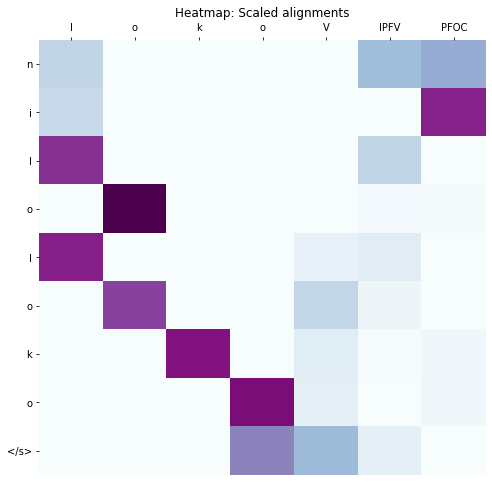

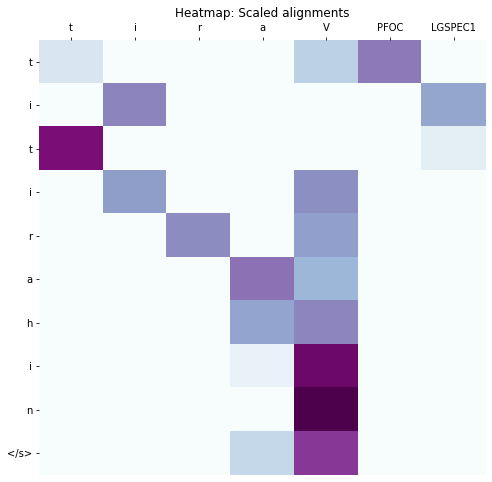

In [5]:
attn_file='{}/{}/ch/gate-sparse-models/predict/{}-dev.pred.{}.attn'.format(exp_dir,lang,lang,beam_size)

attn_data=torch.load(attn_file)

scaled_al_heatmap(attn_data,3)

scaled_al_heatmap(attn_data,15)

#### chED+chSELF-ATT

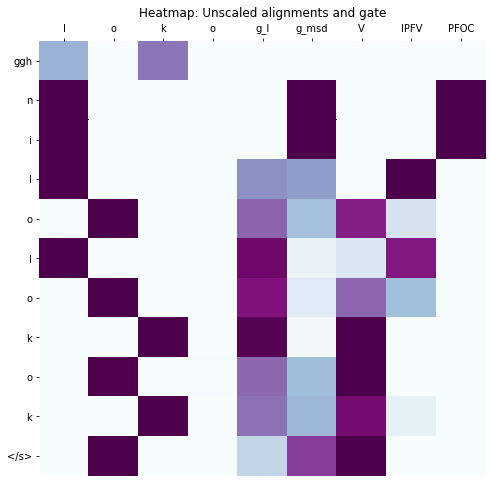

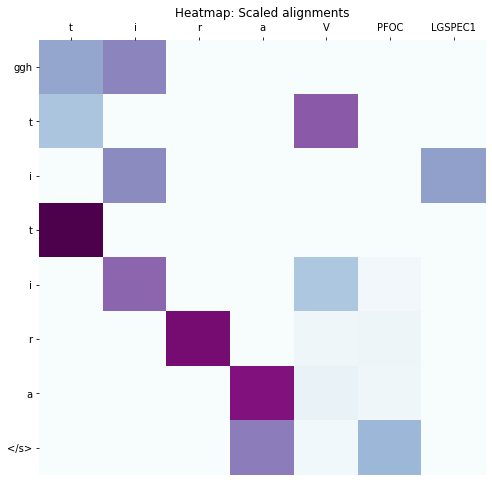

In [6]:
attn_file='{}/{}/ch/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,lang,beam_size)

attn_ggh_data=torch.load(attn_file)
unscaled_al_ggh_heatmap(attn_ggh_data,3,n_global_heads=1)
scaled_al_ggh_heatmap(attn_ggh_data,15,n_global_heads=1)

#### chED+subwSELF-ATT

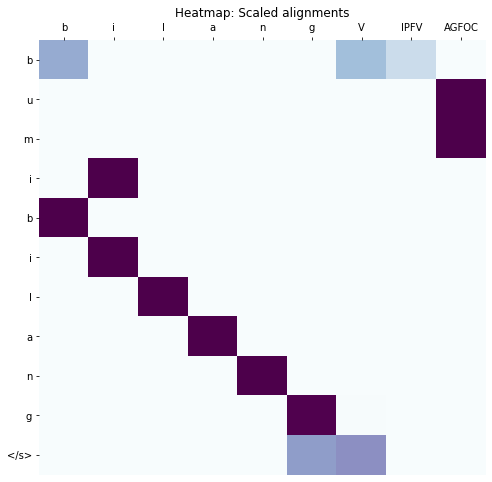

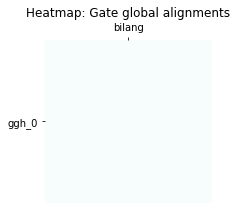

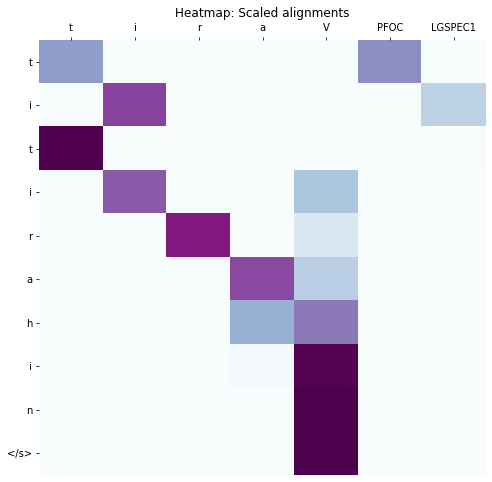

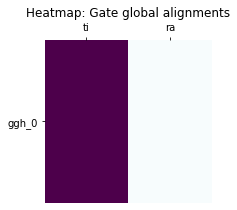

In [7]:
attn_file='{}/{}/bpe{}/gate-sparse-enc-static-head-models/predict/{}-dev.pred.{}.attn'.format(
    exp_dir,lang,bpe_n,lang,beam_size)

attn_ggh_bpe_data_comb=torch.load(attn_file)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,68, bpe=True, bpe_data=bpe_file_dev, n_global_heads=1)
scaled_al_ggh_heatmap(attn_ggh_bpe_data_comb,15, bpe=True, bpe_data=bpe_file_dev, n_global_heads=1)
